# Exploring Intel Power Gadget data. ML serving with different Runtime Engines and different LMs.

- Tool web: https://www.intel.com/content/www/us/en/developer/articles/training/using-the-intel-power-gadget-30-api-on-windows.html


In [1]:
pwd

'D:\\GAISSA\\energy-repo\\energy-ml-serving\\experiments'

In [2]:
cd D:\GAISSA

D:\GAISSA


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
models = ['codet5-base',
 'codet5p-220m',
 'codeparrot-small',
 'pythia-410m']

In [5]:
ls Pwr*

 Volume in drive D is Data
 Volume Serial Number is 5817-1887

 Directory of D:\GAISSA

01/04/2024  10:03       509.966.612 PwrData_01-04_results10.csv
02/04/2024  11:11       486.930.013 PwrData_02-04_results11.csv
30/03/2024  12:25       512.877.941 PwrData_2024-3-30-1-17-31.csv
03/04/2024  10:37       247.983.808 PwrData_2024-4-3-1-27-15.csv
31/03/2024  14:03       635.930.042 PwrData_31-03_results09.csv
26/03/2024  14:58        19.617.358 PwrData_results02.csv
27/03/2024  12:31        20.733.591 PwrData_results03.csv
27/03/2024  15:08       130.490.724 PwrData_results04.csv
27/03/2024  23:07        98.679.360 PwrData_results05.csv
28/03/2024  10:48       404.137.309 PwrData_results06.csv
              10 File(s)  3.067.346.758 bytes
               0 Dir(s)  183.258.443.776 bytes free


In [6]:
file_name = "PwrData_01-04_results10.csv"
df = pd.read_csv(file_name, parse_dates=['System Time'], )#index_col='System Time'

C:\Users\fjdur\AppData\Local\Temp\ipykernel_11496\2454317224.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_name, parse_dates=['System Time'], )#index_col='System Time'


In [7]:
df.columns

Index(['System Time', 'RDTSC', 'Elapsed Time (sec)', ' CPU Utilization(%)',
       'CPU Frequency_0(MHz)', 'Processor Power_0(Watt)',
       'Cumulative Processor Energy_0(Joules)',
       'Cumulative Processor Energy_0(mWh)', 'IA Power_0(Watt)',
       'Cumulative IA Energy_0(Joules)', 'Cumulative IA Energy_0(mWh)',
       'Package Temperature_0(C)', 'Package Hot_0', 'DRAM Power_0(Watt)',
       'Cumulative DRAM Energy_0(Joules)', 'Cumulative DRAM Energy_0(mWh)',
       'GT Power_0(Watt)', 'Cumulative GT Energy_0(Joules)',
       'Cumulative GT Energy_0(mWh)', 'Package PL1_0(Watt)',
       'Package PL2_0(Watt)', 'Package PL4_0(Watt)',
       'Platform PsysPL1_0(Watt)', 'Platform PsysPL2_0(Watt)',
       'GT Frequency(MHz)', 'GT Utilization(%)'],
      dtype='object')

In [8]:
df[-15:]

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),Cumulative Processor Energy_0(mWh),IA Power_0(Watt),Cumulative IA Energy_0(Joules),...,GT Power_0(Watt),Cumulative GT Energy_0(Joules),Cumulative GT Energy_0(mWh),Package PL1_0(Watt),Package PL2_0(Watt),Package PL4_0(Watt),Platform PsysPL1_0(Watt),Platform PsysPL2_0(Watt),GT Frequency(MHz),GT Utilization(%)
2111732,09:59:58:419,2.979331e+14,35117.421,94.0,1600.0,10.6,532956.121,148043.367,7.481,452977.525,...,0.683,28372.771,7881.325,25.0,51.0,90.0,100.0,115.0,99.0,0.0
2111733,Total Elapsed Time (sec) = 35117.421311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111734,Measured RDTSC Frequency (GHz) = 2.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111735,Cumulative Processor Energy_0 (Joules) = 53295...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111736,Cumulative Processor Energy_0 (mWh) = 148043.3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111737,Average Processor Power_0 (Watt) = 15.176403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111738,Cumulative IA Energy_0 (Joules) = 452977.524658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111739,Cumulative IA Energy_0 (mWh) = 125827.090183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111740,Average IA Power_0 (Watt) = 12.898940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111741,Cumulative DRAM Energy_0 (Joules) = 41227.988342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df[:-14] # last 14 lines have summary values
df

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),Cumulative Processor Energy_0(mWh),IA Power_0(Watt),Cumulative IA Energy_0(Joules),...,GT Power_0(Watt),Cumulative GT Energy_0(Joules),Cumulative GT Energy_0(mWh),Package PL1_0(Watt),Package PL2_0(Watt),Package PL4_0(Watt),Platform PsysPL1_0(Watt),Platform PsysPL2_0(Watt),GT Frequency(MHz),GT Utilization(%)
0,00:14:41:026,2.237650e+14,0.025,15.0,3000.0,13.534,0.338,0.094,12.116,0.302,...,0.430,0.011,0.003,25.0,51.0,90.0,100.0,115.0,97.0,17.143
1,00:14:41:042,2.237651e+14,0.040,12.0,2900.0,9.565,0.481,0.134,7.121,0.409,...,0.366,0.016,0.005,25.0,51.0,90.0,100.0,115.0,94.0,19.417
2,00:14:41:073,2.237651e+14,0.071,12.0,2300.0,9.505,0.774,0.215,5.534,0.580,...,0.517,0.032,0.009,25.0,51.0,90.0,100.0,115.0,126.0,18.022
3,00:14:41:092,2.237652e+14,0.090,12.0,2300.0,8.152,0.930,0.258,5.902,0.693,...,0.408,0.040,0.011,25.0,51.0,90.0,100.0,115.0,94.0,18.435
4,00:14:41:109,2.237652e+14,0.107,14.0,2000.0,7.616,1.063,0.295,5.434,0.787,...,0.387,0.047,0.013,25.0,51.0,90.0,100.0,115.0,361.0,70.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111728,09:59:58:231,2.979327e+14,35117.229,13.0,800.0,7.259,532954.004,148042.779,3.443,452976.349,...,2.424,28372.283,7881.190,25.0,51.0,90.0,100.0,115.0,134.0,0.314
2111729,09:59:58:366,2.979330e+14,35117.364,69.0,800.0,10.464,532955.413,148043.170,5.691,452977.115,...,2.535,28372.625,7881.285,25.0,51.0,90.0,100.0,115.0,109.0,2.389
2111730,09:59:58:393,2.979331e+14,35117.394,88.0,800.0,13.119,532955.807,148043.280,7.080,452977.328,...,3.272,28372.723,7881.312,25.0,51.0,90.0,100.0,115.0,219.0,9.087
2111731,09:59:58:408,2.979331e+14,35117.412,71.0,800.0,11.897,532956.023,148043.340,7.035,452977.455,...,2.307,28372.765,7881.324,25.0,51.0,90.0,100.0,115.0,323.0,0.524


In [10]:
df.columns

Index(['System Time', 'RDTSC', 'Elapsed Time (sec)', ' CPU Utilization(%)',
       'CPU Frequency_0(MHz)', 'Processor Power_0(Watt)',
       'Cumulative Processor Energy_0(Joules)',
       'Cumulative Processor Energy_0(mWh)', 'IA Power_0(Watt)',
       'Cumulative IA Energy_0(Joules)', 'Cumulative IA Energy_0(mWh)',
       'Package Temperature_0(C)', 'Package Hot_0', 'DRAM Power_0(Watt)',
       'Cumulative DRAM Energy_0(Joules)', 'Cumulative DRAM Energy_0(mWh)',
       'GT Power_0(Watt)', 'Cumulative GT Energy_0(Joules)',
       'Cumulative GT Energy_0(mWh)', 'Package PL1_0(Watt)',
       'Package PL2_0(Watt)', 'Package PL4_0(Watt)',
       'Platform PsysPL1_0(Watt)', 'Platform PsysPL2_0(Watt)',
       'GT Frequency(MHz)', 'GT Utilization(%)'],
      dtype='object')

In [11]:
df = df.rename(columns={'System Time': 'time'})

In [12]:
energy_columns = ['Cumulative Processor Energy_0(Joules)', 'Cumulative IA Energy_0(Joules)', 'Cumulative DRAM Energy_0(Joules)', 'Cumulative GT Energy_0(Joules)']

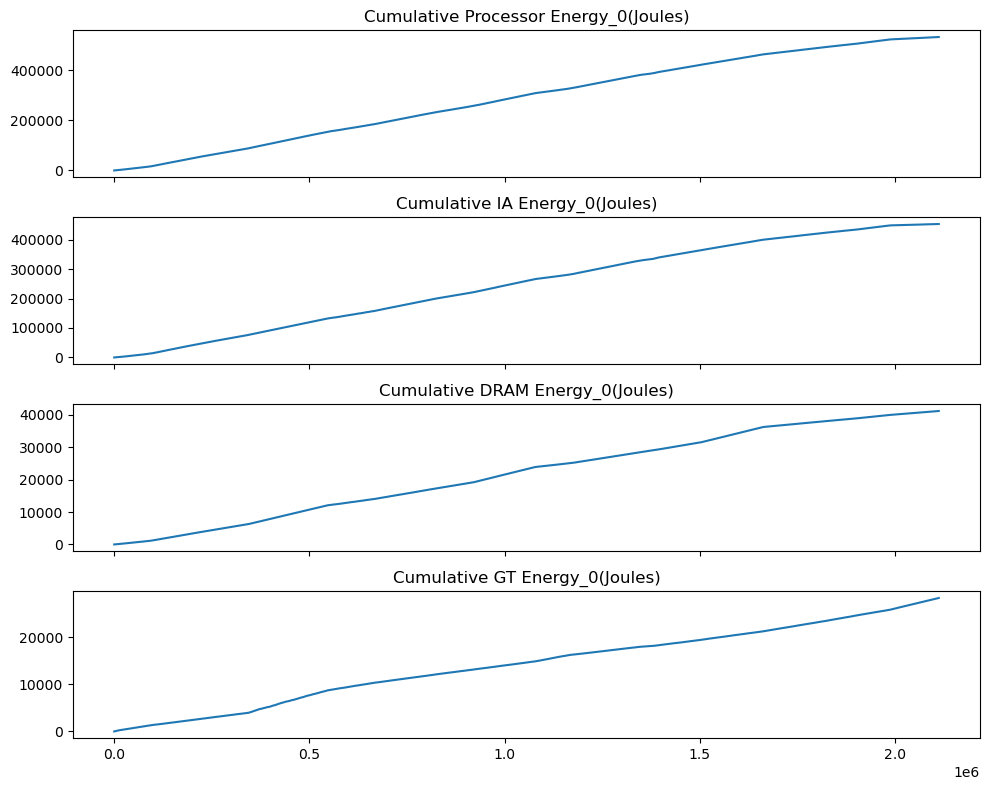

In [13]:
# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    df[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()

### adding columns with the difference between cumulative data points

In [14]:
import pandas as pd

# Assuming df is your DataFrame after reading PwrData.csv
# For example, for the 'Cumulative Processor Energy_0(Joules)' column
df['processor_increment'] = df['Cumulative Processor Energy_0(Joules)'].diff()

# Repeat for other cumulative columns as needed
df['IA_increment'] = df['Cumulative IA Energy_0(Joules)'].diff()
df['DRAM_increment'] = df['Cumulative DRAM Energy_0(Joules)'].diff()
df['GT_increment'] = df['Cumulative GT Energy_0(Joules)'].diff()

In [15]:
df = df.fillna(0)

In [16]:
df.head()

,time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),Cumulative Processor Energy_0(mWh),IA Power_0(Watt),Cumulative IA Energy_0(Joules),...,Package PL2_0(Watt),Package PL4_0(Watt),Platform PsysPL1_0(Watt),Platform PsysPL2_0(Watt),GT Frequency(MHz),GT Utilization(%),processor_increment,IA_increment,DRAM_increment,GT_increment
0,00:14:41:026,2.237650e+14,0.025,15.0,3000.0,13.534,0.338,0.094,12.116,0.302,...,51.0,90.0,100.0,115.0,97.0,17.143,0.000,0.000,0.000,0.000
1,00:14:41:042,2.237651e+14,0.040,12.0,2900.0,9.565,0.481,0.134,7.121,0.409,...,51.0,90.0,100.0,115.0,94.0,19.417,0.143,0.107,0.016,0.005
2,00:14:41:073,2.237651e+14,0.071,12.0,2300.0,9.505,0.774,0.215,5.534,0.580,...,51.0,90.0,100.0,115.0,126.0,18.022,0.293,0.171,0.038,0.016
3,00:14:41:092,2.237652e+14,0.090,12.0,2300.0,8.152,0.930,0.258,5.902,0.693,...,51.0,90.0,100.0,115.0,94.0,18.435,0.156,0.113,0.022,0.008
4,00:14:41:109,2.237652e+14,0.107,14.0,2000.0,7.616,1.063,0.295,5.434,0.787,...,51.0,90.0,100.0,115.0,361.0,70.004,0.133,0.094,0.020,0.007


In [17]:
#energy_columns = ['Cumulative Processor Energy_0(Joules)', 'Cumulative IA Energy_0(Joules)', 'Cumulative DRAM Energy_0(Joules)', 'Cumulative GT Energy_0(Joules)']
energy_increment_columns = ['processor_increment','IA_increment','DRAM_increment','GT_increment']


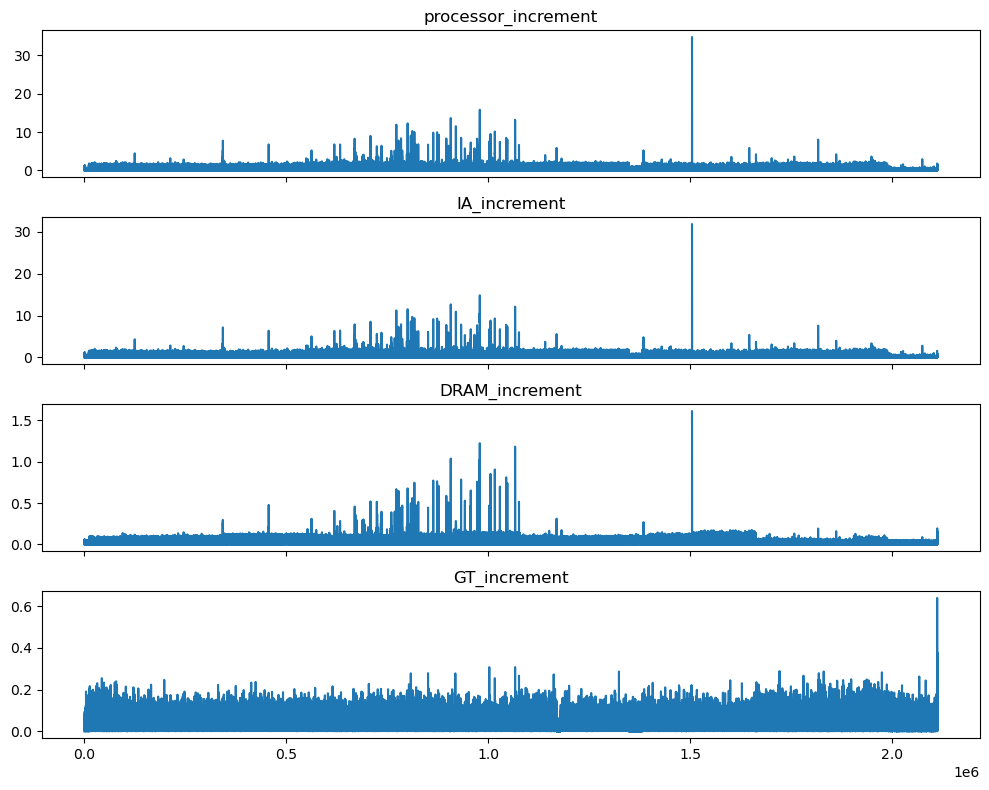

In [18]:
my_columns = energy_increment_columns

# Plotting time series for energy columns
fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()

In [19]:
df['time']

0          00:14:41:026
1          00:14:41:042
2          00:14:41:073
3          00:14:41:092
4          00:14:41:109
               ...     
2111728    09:59:58:231
2111729    09:59:58:366
2111730    09:59:58:393
2111731    09:59:58:408
2111732    09:59:58:419
Name: time, Length: 2111733, dtype: object

In [110]:
import matplotlib.dates as mdates

In [20]:
import re
text = """
Mon, Apr 1, 2024 12:17:43 AM Mon, Apr 1, 2024 12:40:51 AM Mon, Apr 1, 2024 1:16:43 AM Mon, Apr 1, 2024 1:49:46 AM Mon, Apr 1, 2024 2:44:57 AM 
Mon, Apr 1, 2024 2:44:57 AM Mon, Apr 1, 2024 3:17:59 AM Mon, Apr 1, 2024 3:59:01 AM Mon, Apr 1, 2024 4:28:19 AM Mon, Apr 1, 2024 5:12:14 AM 
Mon, Apr 1, 2024 5:12:14 AM Mon, Apr 1, 2024 5:39:40 AM Mon, Apr 1, 2024 6:39:50 AM Mon, Apr 1, 2024 7:09:57 AM Mon, Apr 1, 2024 7:53:46 AM 
Mon, Apr 1, 2024 7:53:46 AM Mon, Apr 1, 2024 8:16:28 AM Mon, Apr 1, 2024 8:39:09 AM Mon, Apr 1, 2024 9:01:08 AM Mon, Apr 1, 2024 9:24:33 AM
"""

# Use regular expression to find all datetime strings
datetime_strings = re.findall(r'\w{3}, \w{3} \d{1,2}, \d{4} \d{1,2}:\d{2}:\d{2} [AP]M', text)

# Enclose each datetime in brackets and join them into a single string
formatted_text = ", ".join(f"\"{datetime}\"" for datetime in datetime_strings)

print(formatted_text)

"Mon, Apr 1, 2024 12:17:43 AM", "Mon, Apr 1, 2024 12:40:51 AM", "Mon, Apr 1, 2024 1:16:43 AM", "Mon, Apr 1, 2024 1:49:46 AM", "Mon, Apr 1, 2024 2:44:57 AM", "Mon, Apr 1, 2024 2:44:57 AM", "Mon, Apr 1, 2024 3:17:59 AM", "Mon, Apr 1, 2024 3:59:01 AM", "Mon, Apr 1, 2024 4:28:19 AM", "Mon, Apr 1, 2024 5:12:14 AM", "Mon, Apr 1, 2024 5:12:14 AM", "Mon, Apr 1, 2024 5:39:40 AM", "Mon, Apr 1, 2024 6:39:50 AM", "Mon, Apr 1, 2024 7:09:57 AM", "Mon, Apr 1, 2024 7:53:46 AM", "Mon, Apr 1, 2024 7:53:46 AM", "Mon, Apr 1, 2024 8:16:28 AM", "Mon, Apr 1, 2024 8:39:09 AM", "Mon, Apr 1, 2024 9:01:08 AM", "Mon, Apr 1, 2024 9:24:33 AM"


In [21]:
df["time"][0]

'00:14:41:026'

In [22]:
from datetime import datetime
import matplotlib.dates as mdates

# Your datetime strings
datetime_strings = [
    "Mon, Apr 1, 2024 12:14:41 AM", #change
    "Mon, Apr 1, 2024 12:17:43 AM", "Mon, Apr 1, 2024 12:40:51 AM", "Mon, Apr 1, 2024 1:16:43 AM", "Mon, Apr 1, 2024 1:49:46 AM", "Mon, Apr 1, 2024 2:44:57 AM", 
    "Mon, Apr 1, 2024 2:44:57 AM", "Mon, Apr 1, 2024 3:17:59 AM", "Mon, Apr 1, 2024 3:59:01 AM", "Mon, Apr 1, 2024 4:28:19 AM", "Mon, Apr 1, 2024 5:12:14 AM",
    "Mon, Apr 1, 2024 5:12:14 AM", "Mon, Apr 1, 2024 5:39:40 AM", "Mon, Apr 1, 2024 6:39:50 AM", "Mon, Apr 1, 2024 7:09:57 AM", "Mon, Apr 1, 2024 7:53:46 AM", 
    "Mon, Apr 1, 2024 7:53:46 AM", "Mon, Apr 1, 2024 8:16:28 AM", "Mon, Apr 1, 2024 8:39:09 AM", "Mon, Apr 1, 2024 9:01:08 AM", "Mon, Apr 1, 2024 9:24:33 AM"


]

# Parse the datetime strings into datetime objects
datetimes = [datetime.strptime(dt, '%a, %b %d, %Y %I:%M:%S %p') for dt in datetime_strings]


In [23]:
assert len(datetimes) == 4*5 +1

In [24]:
#onnx, results04
#0, start inference, finish_codet5, finish_codet5p, finish_codeparrot, finish_pythia, ov_codet5
#results04_times = [ '11:38:33', '11:55:52', '12:36:07', '13:05:17', '13:49:20',]
#results_times = ['20:13:05', '20:45:38', '21:03:40', '21:20:01']
#results_times = ['2:15:32', '02:39:16', '03:15:38', '04:15:57', '04:18:26',  #codet5, codeparrot, pythia, codet5p
#'05:56:31','06:17:32','07:04:23','07:36:38','08:26:29', #normal, ultimo acaba
#'08:26:59','08:56:13', '09:00:38','09:33:14',]# normal, 09:33:14


initial_runtime_times = [datetimes[x+1] for x in range(len(datetimes[1:])) if x%5==0]
initial_runtime_times = [datetimes[0]] + initial_runtime_times
initial_runtime_times

[datetime.datetime(2024, 4, 1, 0, 14, 41),
 datetime.datetime(2024, 4, 1, 0, 17, 43),
 datetime.datetime(2024, 4, 1, 2, 44, 57),
 datetime.datetime(2024, 4, 1, 5, 12, 14),
 datetime.datetime(2024, 4, 1, 7, 53, 46)]

In [25]:
df['time'].head()

0    00:14:41:026
1    00:14:41:042
2    00:14:41:073
3    00:14:41:092
4    00:14:41:109
Name: time, dtype: object

In [26]:
import pandas as pd

# Example DataFrame
#df = pd.DataFrame({
#   'time': ['21:14:16:523', '21:14:16:539', '21:14:16:557', '00:00:00:000', '00:00:00:020']
#})

# Convert 'time' column to datetime objects with a dummy date
df['time_with_day'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f')
n=0
# Function to add day based on time condition
def add_day_based_on_time(dt):
    one_hour_mark = pd.Timestamp(year=dt.year, month=dt.month, day=dt.day, hour=21, minute=0, second=0)
    if dt.time() > one_hour_mark.time():
        # If time is after one hour, use day 01
        return dt.replace(day=1,month=4, year = 2024)
    else:
        # If time is before or equal to one hour, use day 02
        return dt.replace(day=1, month=4,  year = 2024)

# Apply the function to each row in the 'time' column
df['time_with_day'] = df['time_with_day'].apply(add_day_based_on_time)
df['time_with_day']

0         2024-04-01 00:14:41.026
1         2024-04-01 00:14:41.042
2         2024-04-01 00:14:41.073
3         2024-04-01 00:14:41.092
4         2024-04-01 00:14:41.109
                    ...          
2111728   2024-04-01 09:59:58.231
2111729   2024-04-01 09:59:58.366
2111730   2024-04-01 09:59:58.393
2111731   2024-04-01 09:59:58.408
2111732   2024-04-01 09:59:58.419
Name: time_with_day, Length: 2111733, dtype: datetime64[ns]

In [27]:
print(df['time'].head())
print(df['time_with_day'].head())

0    00:14:41:026
1    00:14:41:042
2    00:14:41:073
3    00:14:41:092
4    00:14:41:109
Name: time, dtype: object
0   2024-04-01 00:14:41.026
1   2024-04-01 00:14:41.042
2   2024-04-01 00:14:41.073
3   2024-04-01 00:14:41.092
4   2024-04-01 00:14:41.109
Name: time_with_day, dtype: datetime64[ns]


In [28]:
#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f')
#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f')
#datetimes = [datetime.strptime(dt, '%a, %b %d, %Y %I:%M:%S %p') for dt in datetime_strings]

In [29]:
df.index

RangeIndex(start=0, stop=2111733, step=1)

In [30]:
initial_runtime_times

[datetime.datetime(2024, 4, 1, 0, 14, 41),
 datetime.datetime(2024, 4, 1, 0, 17, 43),
 datetime.datetime(2024, 4, 1, 2, 44, 57),
 datetime.datetime(2024, 4, 1, 5, 12, 14),
 datetime.datetime(2024, 4, 1, 7, 53, 46)]

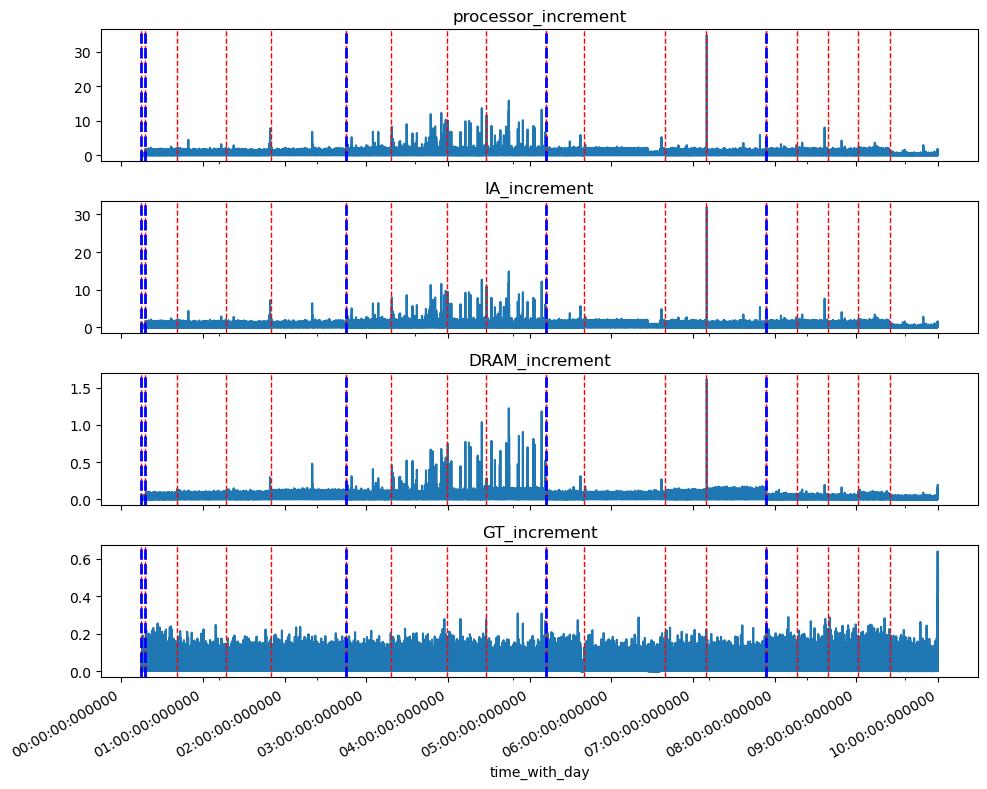

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Example DataFrame index parsing for demonstration
# Assuming the index is datetime with a specific format, adjust accordingly

# Define times for vertical lines, ensuring they match your DataFrame's time range and format
# This example assumes you need to adjust this part to match your actual data
vertical_lines_times = datetimes
# Convert these strings to datetime objects that match your DataFrame's index format
vertical_lines_datetimes = pd.to_datetime(vertical_lines_times, format='%H:%M:%S') # %f
vertical_initial_datetimes = pd.to_datetime(initial_runtime_times, format='%H:%M:%S') # %f

df.set_index('time_with_day', inplace=True)

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)
    for dt in vertical_lines_datetimes:
        axs[i].axvline(dt, color='r', linestyle='--', lw=1)
    for dt in vertical_initial_datetimes:
        axs[i].axvline(dt, color='b', linestyle='--', lw=2)

# If your DataFrame's index is very specific, consider setting the formatter for the x-axis
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S:%f'))

plt.savefig('results06.svg')

plt.tight_layout()
plt.show()



In [32]:
df.index[0]

Timestamp('2024-04-01 00:14:41.026000')

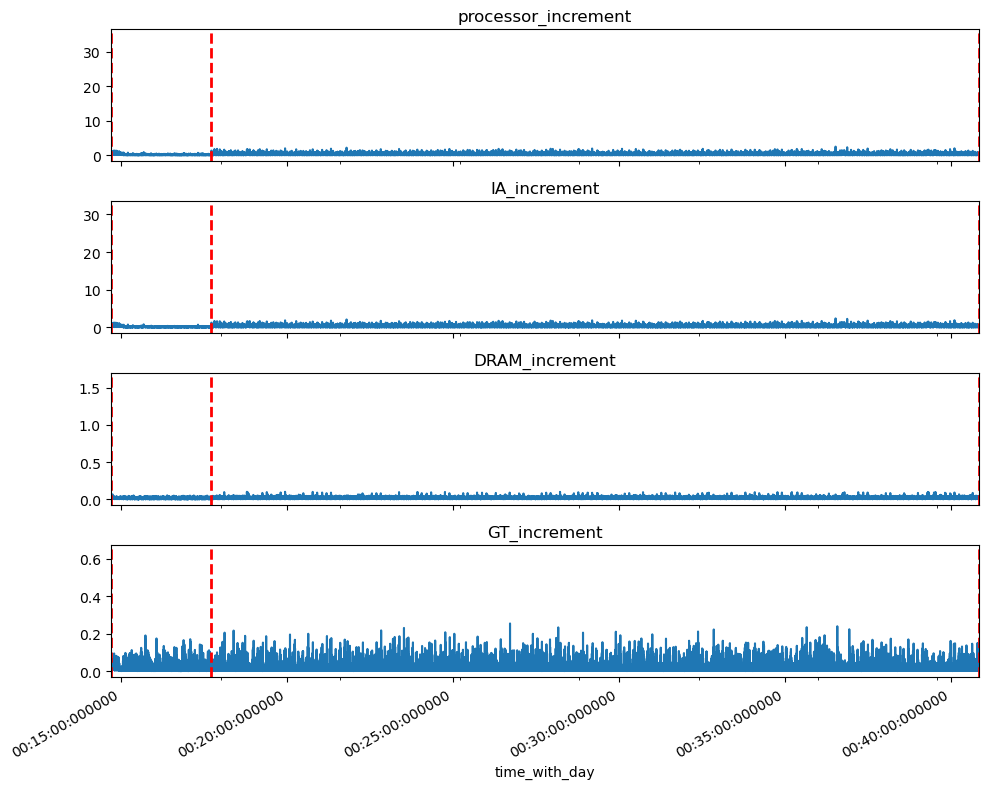

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Example DataFrame index parsing for demonstration
#df.index = pd.to_datetime(df.index, format='%H:%M:%S:%f')

# Define the focus range for your plots
start_time = datetimes[0]  # Adjust these times
end_time = datetimes[2]   # to match your data and needs

# Convert the start and end times to datetime objects
#start_datetime = pd.to_datetime(start_time)
start_datetime = pd.to_datetime(start_time, format='%H:%M:%S')
end_datetime = pd.to_datetime(end_time, format='%H:%M:%S')

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)
    # Set the x-axis limit to focus on the specified range
    axs[i].set_xlim(start_datetime, end_datetime)
    # Plot vertical lines within the specified range
    for dt in vertical_lines_datetimes:
        if start_datetime <= dt <= end_datetime:
            axs[i].axvline(dt, color='r', linestyle='--', lw=2)

# Format the x-axis to show your preferred datetime format
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S:%f'))

plt.tight_layout()
plt.show()


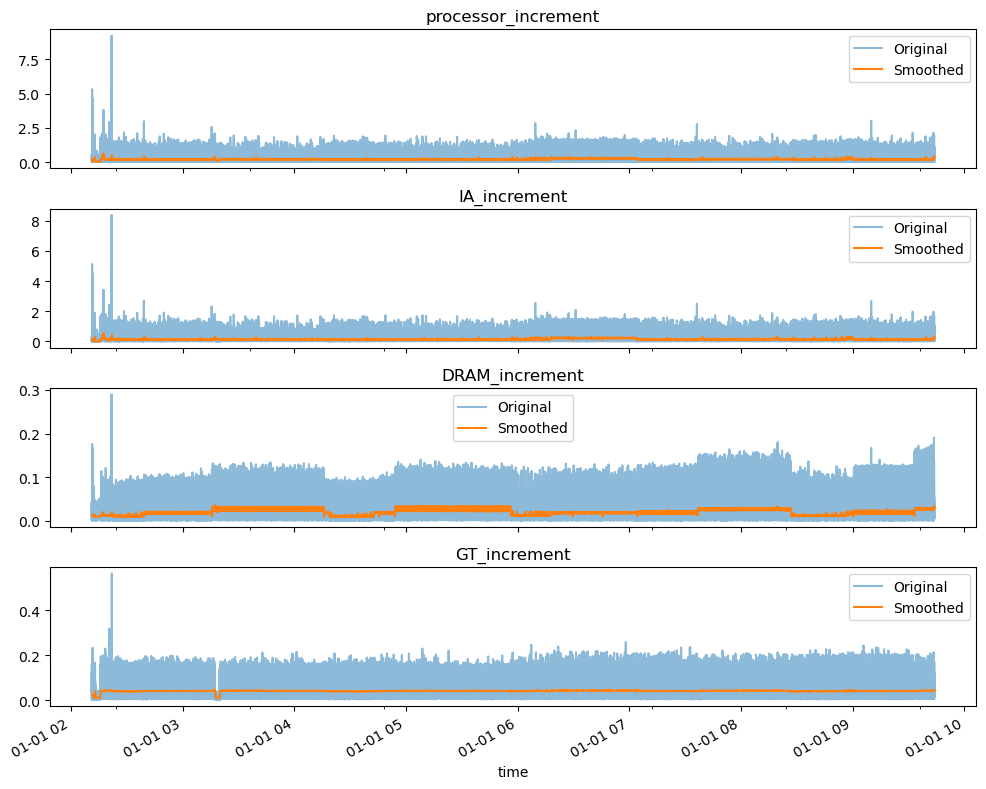

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame loading and columns setup
# df = pd.read_csv('PwrData.csv')

# Define the window size for the moving average
window_size = 1000  # Adjust based on your data's granularity and the degree of smoothing you want

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    # Original data
    df[col].plot(ax=axs[i], title=col, alpha=0.5, label='Original')
    # Smoothed data
    df[col].rolling(window=window_size).mean().plot(ax=axs[i], label='Smoothed')
    
    # Add legend to each subplot to differentiate original from smoothed
    axs[i].legend()

plt.tight_layout()
plt.show()

### TODO:
"""
- average on each range: torch-m1, torch-m2,..., onnx-m1,...
- or augment data, with the corresponding runtime and model at that time, first identifying the times, then label the datapoints

- get average according to ranges
    - runtime, model, start_time, end_time, average, total_energy

- [ ] get time list automatically from bash script
- [ ] CPU machine learning intel power gadget
"""



In [34]:
# ['2:15:32', '02:39:16', '03:15:38', '04:15:57', '04:18:26',     # codet5, codeparrot, pythia, codet5p
# '05:56:31','06:17:32','07:04:23','07:36:38','08:26:29',         # normal, ultimo acaba
# '08:26:59','08:56:13', '09:00:38','09:33:14',]                  # normal, 09:33:14, ...
print(len(datetimes))
datetimes

21


[datetime.datetime(2024, 4, 1, 0, 14, 41),
 datetime.datetime(2024, 4, 1, 0, 17, 43),
 datetime.datetime(2024, 4, 1, 0, 40, 51),
 datetime.datetime(2024, 4, 1, 1, 16, 43),
 datetime.datetime(2024, 4, 1, 1, 49, 46),
 datetime.datetime(2024, 4, 1, 2, 44, 57),
 datetime.datetime(2024, 4, 1, 2, 44, 57),
 datetime.datetime(2024, 4, 1, 3, 17, 59),
 datetime.datetime(2024, 4, 1, 3, 59, 1),
 datetime.datetime(2024, 4, 1, 4, 28, 19),
 datetime.datetime(2024, 4, 1, 5, 12, 14),
 datetime.datetime(2024, 4, 1, 5, 12, 14),
 datetime.datetime(2024, 4, 1, 5, 39, 40),
 datetime.datetime(2024, 4, 1, 6, 39, 50),
 datetime.datetime(2024, 4, 1, 7, 9, 57),
 datetime.datetime(2024, 4, 1, 7, 53, 46),
 datetime.datetime(2024, 4, 1, 7, 53, 46),
 datetime.datetime(2024, 4, 1, 8, 16, 28),
 datetime.datetime(2024, 4, 1, 8, 39, 9),
 datetime.datetime(2024, 4, 1, 9, 1, 8),
 datetime.datetime(2024, 4, 1, 9, 24, 33)]

In [35]:
[(datetimes[i],datetimes[i+1]) for i in range(len(datetimes)-1)]

[(datetime.datetime(2024, 4, 1, 0, 14, 41),
  datetime.datetime(2024, 4, 1, 0, 17, 43)),
 (datetime.datetime(2024, 4, 1, 0, 17, 43),
  datetime.datetime(2024, 4, 1, 0, 40, 51)),
 (datetime.datetime(2024, 4, 1, 0, 40, 51),
  datetime.datetime(2024, 4, 1, 1, 16, 43)),
 (datetime.datetime(2024, 4, 1, 1, 16, 43),
  datetime.datetime(2024, 4, 1, 1, 49, 46)),
 (datetime.datetime(2024, 4, 1, 1, 49, 46),
  datetime.datetime(2024, 4, 1, 2, 44, 57)),
 (datetime.datetime(2024, 4, 1, 2, 44, 57),
  datetime.datetime(2024, 4, 1, 2, 44, 57)),
 (datetime.datetime(2024, 4, 1, 2, 44, 57),
  datetime.datetime(2024, 4, 1, 3, 17, 59)),
 (datetime.datetime(2024, 4, 1, 3, 17, 59),
  datetime.datetime(2024, 4, 1, 3, 59, 1)),
 (datetime.datetime(2024, 4, 1, 3, 59, 1),
  datetime.datetime(2024, 4, 1, 4, 28, 19)),
 (datetime.datetime(2024, 4, 1, 4, 28, 19),
  datetime.datetime(2024, 4, 1, 5, 12, 14)),
 (datetime.datetime(2024, 4, 1, 5, 12, 14),
  datetime.datetime(2024, 4, 1, 5, 12, 14)),
 (datetime.datetime(202

In [36]:
df.index[0]

Timestamp('2024-04-01 00:14:41.026000')

In [38]:
df["time"][0]

C:\Users\fjdur\AppData\Local\Temp\ipykernel_11496\975838214.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["time"][0]


'00:14:41:026'

In [39]:
# Define your time ranges
#time_list = results_times
#datetimes_list = pd.to_datetime(time_list, format='%H:%M:%S')

# (df.index[0], datetimes[0])] already added
time_ranges = [(datetimes[i],datetimes[i+1]) for i in range(len(datetimes)-1)] + [(datetimes[-1],df.index[-1])]

#runtime = "r5"
# Labels corresponding to your ranges
#labels = ["idle", "torch_codet5", "torch_codet5p", "torch_codeparrot", "torch_pythia","onnx_codet5","onnx_codet5p"]  # Extend this list according to your ranges
labels = ["idle", 
          f"torch_codet5",f"torch_codeparrot", f"torch_pythia",f"torch_codet5p",
          "other",
          f"onnx_codet5",f"onnx_codet5p", f"onnx_codeparrot",f"onnx_pythia",
          "other",
          f"ov_codet5",f"ov_codet5p", f"ov_codeparrot",f"ov_pythia",
          "other",
          f"torchscript_codet5",f"torchscript_codet5p", f"torchscript_codeparrot",f"torchscript_pythia",
            "last",]  # Extend this list according to your ranges

assert len(time_ranges) == len(labels), print(f"{len(time_ranges)}-{len(labels)}")
# Function to determine the label based on the range
def determine_label(row):
    for i, time_range in enumerate(time_ranges):
        if time_range[0] <= row.name <= time_range[1]:
            return labels[i]  # Return the corresponding label
    return "Outside Ranges"  # Label for times outside the defined ranges

# Apply the function to create a new column for labels
df['label'] = df.apply(determine_label, axis=1)

In [40]:
df[df['label'] == 'onnx_pythia']

,time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),Cumulative Processor Energy_0(mWh),IA Power_0(Watt),Cumulative IA Energy_0(Joules),...,Package PL4_0(Watt),Platform PsysPL1_0(Watt),Platform PsysPL2_0(Watt),GT Frequency(MHz),GT Utilization(%),processor_increment,IA_increment,DRAM_increment,GT_increment,label
time_with_day,,,,,,,,,,,,,,,,,,,,,
2024-04-01 04:28:19.001,04:28:19:001,2.559055e+14,15218.000,8.0,800.0,1.559,257426.660,71507.406,0.855,221179.352,...,90.0,100.0,115.0,81.0,0.0,0.025,0.013,0.009,0.007,onnx_pythia
2024-04-01 04:28:19.017,04:28:19:017,2.559055e+14,15218.015,4.0,800.0,2.295,257426.695,71507.415,0.990,221179.367,...,90.0,100.0,115.0,85.0,0.0,0.035,0.015,0.009,0.006,onnx_pythia
2024-04-01 04:28:19.033,04:28:19:033,2.559055e+14,15218.031,4.0,800.0,1.985,257426.727,71507.424,0.693,221179.378,...,90.0,100.0,115.0,85.0,0.0,0.032,0.011,0.009,0.006,onnx_pythia
2024-04-01 04:28:19.048,04:28:19:048,2.559056e+14,15218.047,4.0,800.0,1.746,257426.754,71507.432,0.614,221179.388,...,90.0,100.0,115.0,82.0,0.0,0.027,0.010,0.009,0.007,onnx_pythia
2024-04-01 04:28:19.064,04:28:19:064,2.559056e+14,15218.062,9.0,800.0,1.887,257426.784,71507.440,0.660,221179.398,...,90.0,100.0,115.0,83.0,0.0,0.030,0.010,0.009,0.006,onnx_pythia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 05:12:13.925,05:12:13:925,2.614704e+14,17852.923,10.0,800.0,2.601,308727.421,85757.617,1.020,266047.365,...,90.0,100.0,115.0,85.0,0.0,0.041,0.016,0.009,0.007,onnx_pythia
2024-04-01 05:12:13.940,05:12:13:940,2.614705e+14,17852.939,15.0,800.0,2.469,308727.459,85757.628,0.783,266047.377,...,90.0,100.0,115.0,84.0,0.0,0.038,0.012,0.012,0.007,onnx_pythia
2024-04-01 05:12:13.956,05:12:13:956,2.614705e+14,17852.954,3.0,800.0,1.726,308727.487,85757.635,0.627,266047.387,...,90.0,100.0,115.0,81.0,0.0,0.028,0.010,0.009,0.007,onnx_pythia


In [41]:
 df['label'].unique()

array(['idle', 'torch_codet5', 'torch_codeparrot', 'torch_pythia',
       'torch_codet5p', 'onnx_codet5', 'onnx_codet5p', 'onnx_codeparrot',
       'onnx_pythia', 'ov_codet5', 'ov_codet5p', 'ov_codeparrot',
       'ov_pythia', 'torchscript_codet5', 'torchscript_codet5p',
       'torchscript_codeparrot', 'torchscript_pythia', 'last'],
      dtype=object)

In [42]:
idle_df = df[df['label'] == 'idle']

other = df[df['label'] == 'other']

torch_codet5 = df[df['label'] == 'torch_codet5']
torch_codeparrot = df[df['label'] == 'torch_codeparrot']
torch_pythia = df[df['label'] == 'torch_pythia']
torch_codet5p = df[df['label'] == 'torch_codet5p']

onnx_codet5 = df[df['label'] == 'onnx_codet5']
onnx_codet5p = df[df['label'] == 'onnx_codet5p']
onnx_codeparrot = df[df['label'] == 'onnx_codeparrot']
onnx_pythia = df[df['label'] == 'onnx_pythia']

ov_codet5 = df[df['label'] == 'ov_codet5']
ov_codet5p = df[df['label'] == 'ov_codet5p']
ov_codeparrot = df[df['label'] == 'ov_codeparrot']
ov_pythia = df[df['label'] == 'ov_pythia']

torchscript_codet5 = df[df['label'] == 'torchscript_codet5']
torchscript_codet5p = df[df['label'] == 'torchscript_codet5p']
torchscript_codeparrot = df[df['label'] == 'torchscript_codeparrot']
torchscript_pythia = df[df['label'] == 'torchscript_pythia']

In [43]:
dfs = [idle_df,
       torch_codet5, torch_codet5p, torch_codeparrot, torch_pythia, 
       onnx_codet5, onnx_codet5p, onnx_codeparrot, onnx_pythia,
       ov_codet5, ov_codet5p, ov_codeparrot, ov_pythia,
      torchscript_codet5, torchscript_codet5p, torchscript_codeparrot, torchscript_pythia]

In [44]:
# Assuming each DataFrame has a column named "name" whose average you want to compute
dfs_dict = {
    "idle_df": idle_df,
    "torch_codet5": torch_codet5, "torch_codet5p": torch_codet5p, 
    "torch_codeparrot": torch_codeparrot, "torch_pythia": torch_pythia,
    "onnx_codet5": onnx_codet5, "onnx_codet5p": onnx_codet5p, 
    "onnx_codeparrot": onnx_codeparrot, "onnx_pythia": onnx_pythia,
    "ov_codet5": ov_codet5, "ov_codet5p": ov_codet5p, 
    "ov_codeparrot": ov_codeparrot, "ov_pythia": ov_pythia,
    "torchscript_codet5": torchscript_codet5, "torchscript_codet5p": torchscript_codet5p, 
    "torchscript_codeparrot": torchscript_codeparrot, "torchscript_pythia": torchscript_pythia
}

# Iterate through the dictionary and print the name and the average of the "name" column
for df_name, df in dfs_dict.items():
    avg_column_value = df[energy_increment_columns].mean()  # Replace "name" with the actual column name you're interested in
    print(f"{df_name}: Average of 'name' column = {avg_column_value}") 

idle_df: Average of 'name' column = processor_increment    0.114916
IA_increment           0.072099
DRAM_increment         0.010358
GT_increment           0.020559
dtype: float64
torch_codet5: Average of 'name' column = processor_increment    0.182268
IA_increment           0.149116
DRAM_increment         0.012524
GT_increment           0.013161
dtype: float64
torch_codet5p: Average of 'name' column = processor_increment    0.326833
IA_increment           0.274321
DRAM_increment         0.028567
GT_increment           0.023568
dtype: float64
torch_codeparrot: Average of 'name' column = processor_increment    0.302208
IA_increment           0.267530
DRAM_increment         0.020975
GT_increment           0.010609
dtype: float64
torch_pythia: Average of 'name' column = processor_increment    0.273338
IA_increment           0.238679
DRAM_increment         0.020194
GT_increment           0.010621
dtype: float64
onnx_codet5: Average of 'name' column = processor_increment    0.249888
IA_incre

In [45]:
properties = energy_increment_columns
print(properties)

['processor_increment', 'IA_increment', 'DRAM_increment', 'GT_increment']


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

 Average of 'processor_increment' column = 0.302208196194296
 Average of 'processor_increment' column = 0.25927281697089316
 Average of 'processor_increment' column = 0.16948315936863556
 Average of 'processor_increment' column = 0.2643352068366003


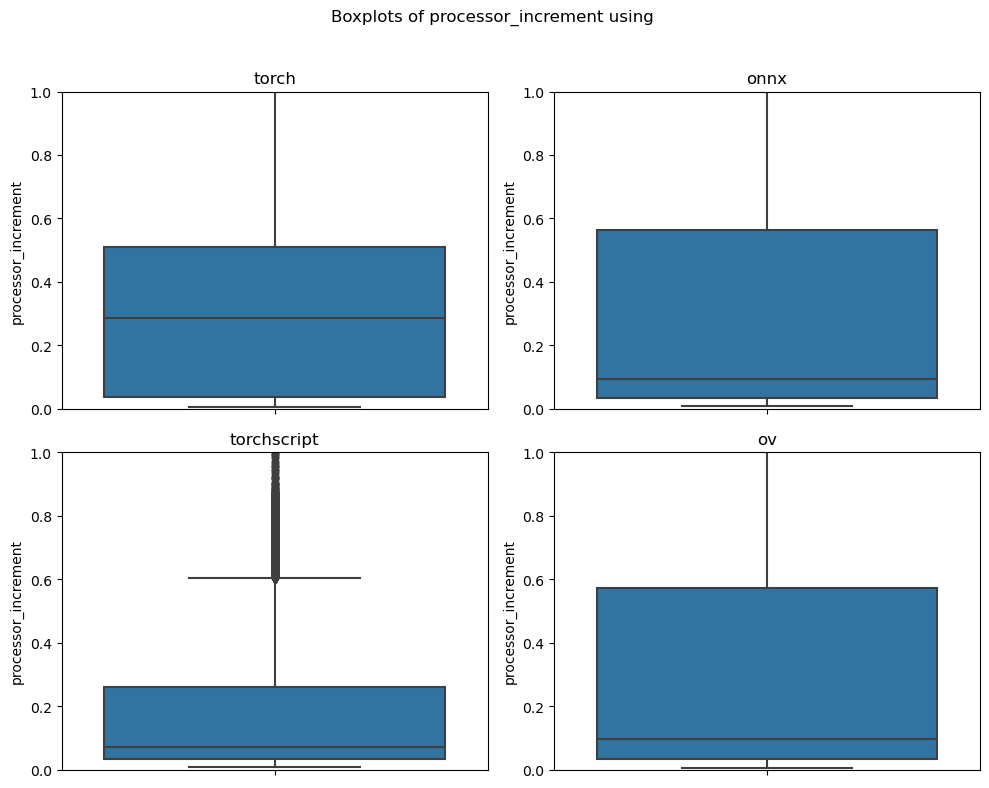

 Average of 'IA_increment' column = 0.2675295607978813
 Average of 'IA_increment' column = 0.22384110659937026
 Average of 'IA_increment' column = 0.13468690173116124
 Average of 'IA_increment' column = 0.2292426753994612


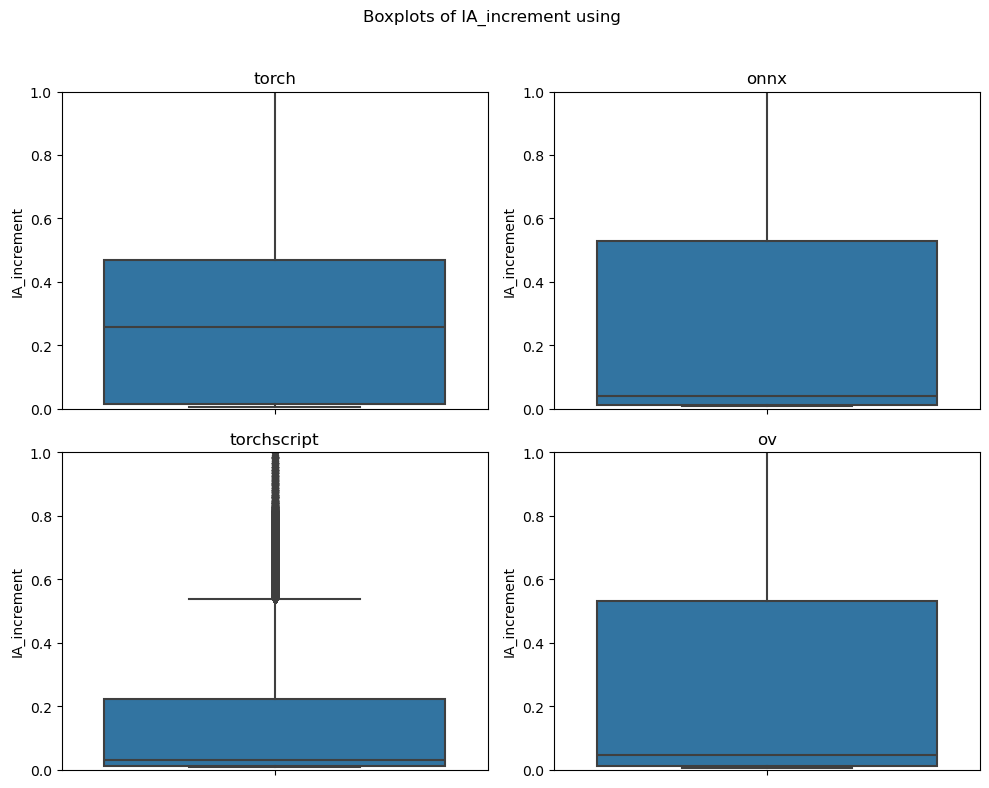

 Average of 'DRAM_increment' column = 0.02097453423755798
 Average of 'DRAM_increment' column = 0.019965580053887908
 Average of 'DRAM_increment' column = 0.010941522403258642
 Average of 'DRAM_increment' column = 0.020352960656431385


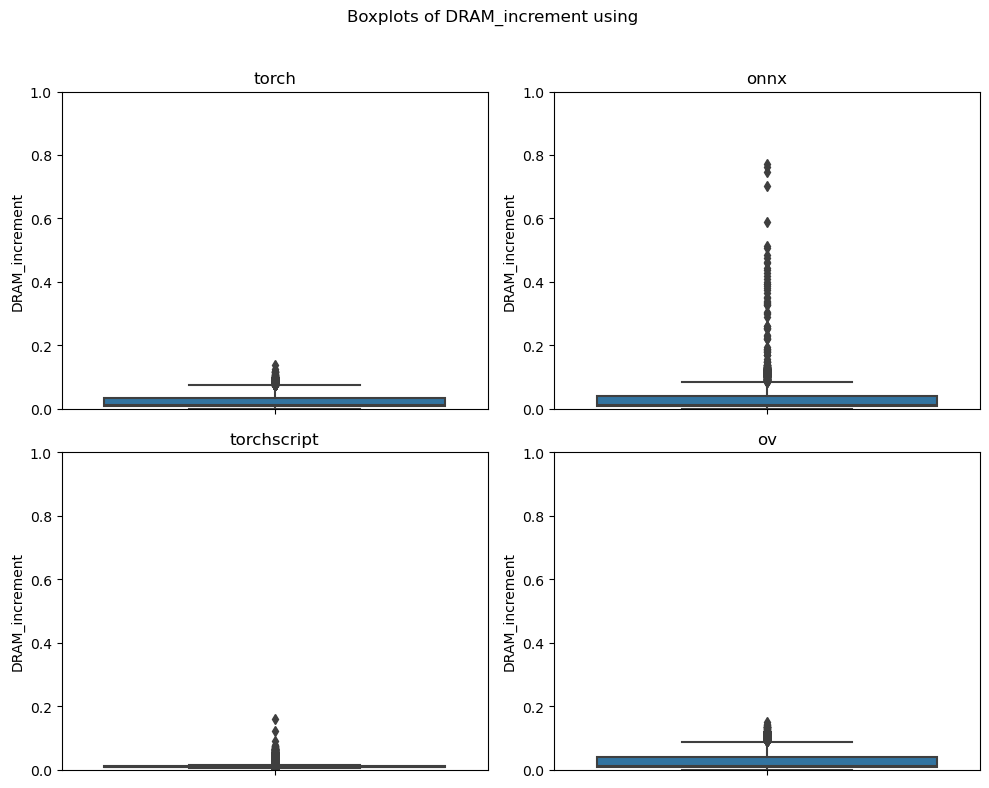

 Average of 'GT_increment' column = 0.010609195842199532
 Average of 'GT_increment' column = 0.01093705172479222
 Average of 'GT_increment' column = 0.014805969959266838
 Average of 'GT_increment' column = 0.010552364569630839


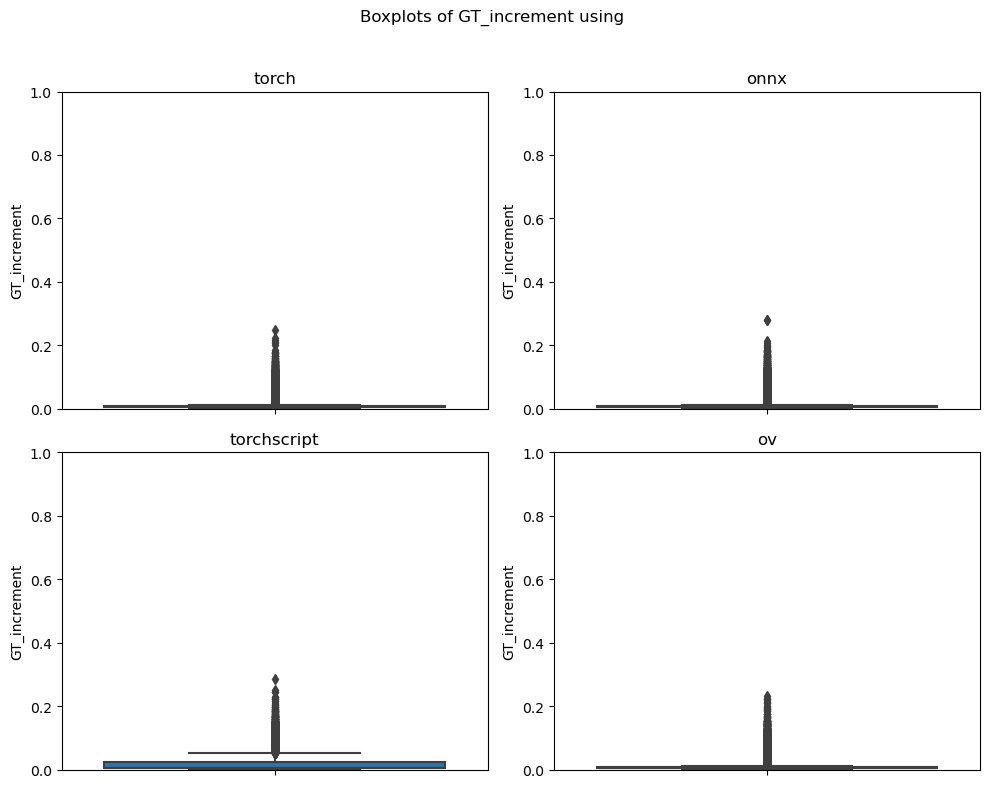

In [50]:
#property = 'duration'

dfs_dict = {
    "idle_df": idle_df,
    "torch_codet5": torch_codet5, "torch_codet5p": torch_codet5p, 
    "torch_codeparrot": torch_codeparrot, "torch_pythia": torch_pythia,
    "onnx_codet5": onnx_codet5, "onnx_codet5p": onnx_codet5p, 
    "onnx_codeparrot": onnx_codeparrot, "onnx_pythia": onnx_pythia,
    "ov_codet5": ov_codet5, "ov_codet5p": ov_codet5p, 
    "ov_codeparrot": ov_codeparrot, "ov_pythia": ov_pythia,
    "torchscript_codet5": torchscript_codet5, "torchscript_codet5p": torchscript_codet5p, 
    "torchscript_codeparrot": torchscript_codeparrot, "torchscript_pythia": torchscript_pythia
}

for property in properties:
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    
    model_runtimes = [torch_codet5, onnx_codet5, torchscript_codet5, ov_codet5]
    model_runtimes = [torch_codet5p, onnx_codet5p, torchscript_codet5p, ov_codet5p]
    model_runtimes = [torch_codeparrot, onnx_codeparrot, torchscript_codeparrot, ov_codeparrot]
    #model_runtimes = [torch_pythia, onnx_pythia, torchscript_pythia, ov_pythia]
    
    #avg_column_value = df[energy_increment_columns].mean()  # Replace "name" with the actual column name you're interested in
    #print(f"{df_name}: Average of 'name' column = {avg_column_value}") 
    for m in model_runtimes:
        print(f" Average of '{property}' column = {m[property].mean()}") 
    # Create boxplots for each variable in the corresponding subplot
    sns.boxplot(y=property, data = model_runtimes[0], ax=axes[0, 0])
    sns.boxplot(y=property, data = model_runtimes[1], ax=axes[0, 1])
    sns.boxplot(y=property, data = model_runtimes[2], ax=axes[1, 0])
    sns.boxplot(y=property, data = model_runtimes[3], ax=axes[1, 1])
    
    # Adding titles to each subplot
    axes[0, 0].set_title('torch')
    axes[0, 1].set_title('onnx')
    axes[1, 0].set_title('torchscript')
    axes[1, 1].set_title('ov')

    min_y = 0
    max_y = 1
    # Set y-axis limits for each subplot
    axes[0, 0].set_ylim(min_y, max_y)  # Adjust the range as needed
    axes[0, 1].set_ylim(min_y, max_y)  # Adjust the range as needed
    axes[1, 0].set_ylim(min_y, max_y)  # Adjust the range as needed
    axes[1, 1].set_ylim(min_y, max_y)  # Adjust the range as needed

    # Set plot title and adjust layout
    fig.suptitle(f'Boxplots of {property} using ') #energy consumed [kWh]
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the position of the title
    
    # Show the plot
    plt.show()
    